# Ainley Mathieson Loss Correlation 

Ainley Mathieson Loss correlation is used to estimate pressure loss for axial steam turbines. These turbines are unique in that they are impulse meaning the inlet metal angle is equal to exit metal angle (alpha1 = alpha2 for stators or beta1 = beta2 for rotors). 

Ainley Mathieson performed their experiments using a Cascade wind tunnel. Reynolds number ranges from 1E5 to 3E5 at mach numbers <0.6 

One thing to note is with these loss models, the authors attempt to derive an equation that couples physical geometry with the effects of loss in experimental measurements. 

The purpose of this tutorial is to illustrate how to use the csv files containing plot data to build a dataset pickle file for the loss model code ainleymathieson.py to load and predict the pressure loss.



## Build a dataset pickle file

Ainley Mathieson paper contains many equations and figures. Of all the equations and figures the following are used to compute loss: Figure 04(a,b), Figure 08 and Equation 4.

In [2]:
!pip install td3

ERROR: Could not find a version that satisfies the requirement td3 (from versions: none)
ERROR: No matching distribution found for td3


In [3]:
import sys
sys.path.insert(0,"../../")
from td3 import LossInterp

In [8]:
Fig04a = LossInterp("Fig04a.csv", 
                    xlabel="Pitch/Chord", 
                    ylabel="Profile Loss Coefficient Yp, Nozzle/Stator Beta1=0", clabel="Outlet Gas Angle")

Fig04b = LossInterp("Fig04b.csv", 
                    xlabel="Pitch/Chord", 
                    ylabel="Profile Loss Coefficient Yp, Impulse", 
                    clabel="Outlet Values of Exit Gas Angle, alpha2")

Fig08 = LossInterp("Fig08.csv",
                    xlabel='(A2/A1)**2 / (1+ID/OD)',
                    ylabel='Lambda')
Fig05 = LossInterp("Fig05.csv",
                        xlabel="arccos(o/s)",
                        ylabel="Exlt Flow Angle Alpha2*"),
import pickle
import os, pathlib 

default_home = os.path.join(os.path.expanduser("~"), ".cache")
os.environ['TD3_HOME'] = os.path.join(default_home,'TD3_LossModels')
os.makedirs(os.environ['TD3_HOME'],exist_ok=True)
path = pathlib.Path(os.path.join(os.environ['TD3_HOME'],"ainleymathieson"+".pkl"))

with open(path.absolute(),'wb') as f:
        pickle.dump({
                        'Fig04a':Fig04a,
                        'Fig04b':Fig04b,
                        'Fig05':Fig05,
                        'Fig08':Fig08},f)

c:\Users\pjuangph\Anaconda3\envs\dev\Lib\site-packages\scipy\interpolate\_fitpack2.py:1424: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=23). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)
c:\Users\pjuangph\Anaconda3\envs\dev\Lib\site-packages\scipy\interpolate\_fitpack2.py:1424: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=23). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


## Validating Results

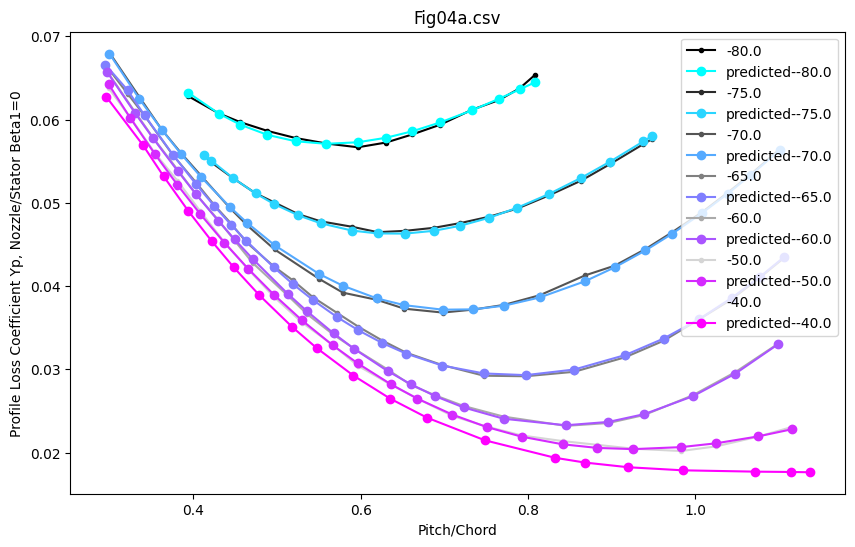

In [5]:
Fig04a.plot()

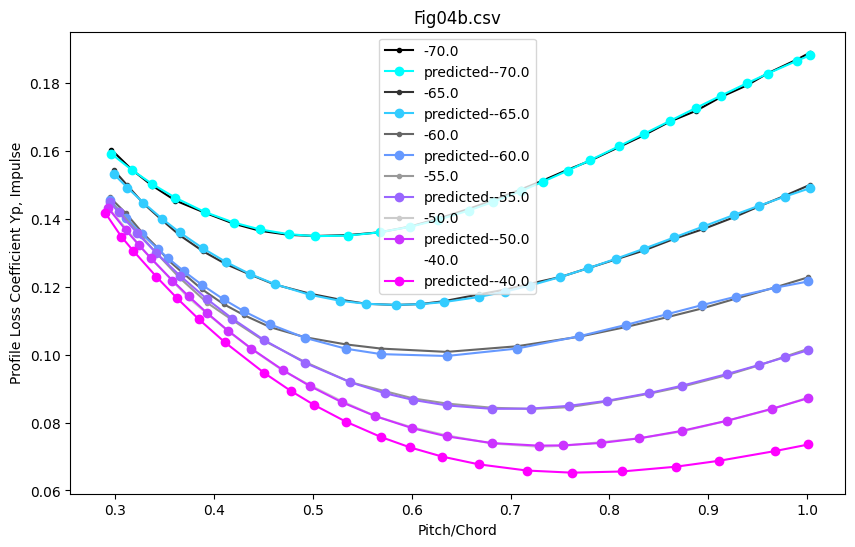

In [6]:
Fig04b.plot()

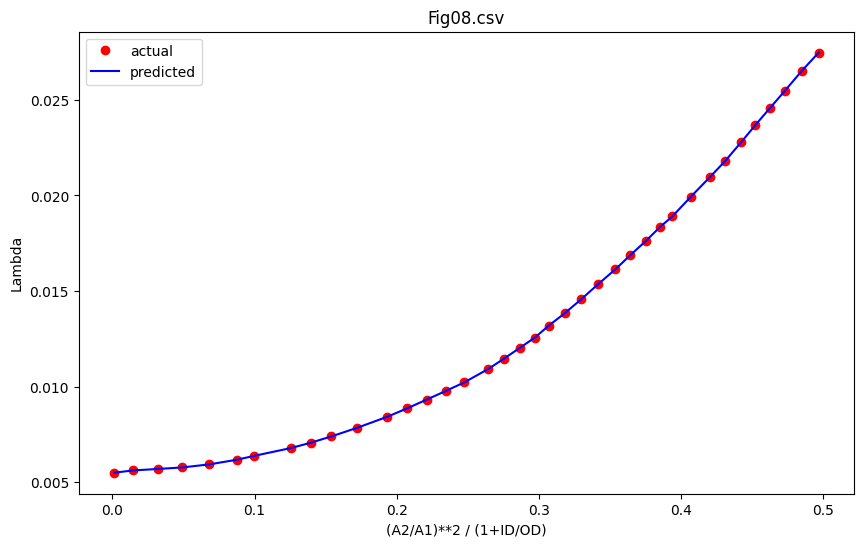

In [7]:
Fig08.plot()

# How do you use it?

Ainley mathieson breaks down the loss into profile loss $Y_P$, secondary loss $Y_S$, and clearance loss $Y_K$.


### Equation 4 Outlet Gas Angle

### Equation 4 Profile loss at zero incidence

$$Y_{P(i=0)} = Y_{P(\beta=0)} + (\beta_1 / \alpha_2)^2 (Y_{P(\beta_1 = \alpha_2)} - Y_{P(\beta = 0)}) (\frac{t/c}{0.2})^{-\beta_1/\alpha_2}$$

$Y_{P(\beta=0)}$ This is the profile loss for a blade with a zero degree metal leading edge. 

$\beta_1 / \alpha_2$ Angle of the metal leading edge divided by the exit flow angle. Note: Exit flow angle can deviate from the metal exit angle. 

$Y_{P(\beta_1 = \alpha_2)}$ This is the loss quantity for an impulse turbine where you have the metal angle equal to the exit flow angle. 

$\frac{t/c}{0.2}$ Thickness to chord



## Example
**Step 1: Calculate Outlet Gas Angle $\alpha_2$ if Mach<0.5**

Mach <0.5 
Use Figure ![Outlet Gas Angle](Fig05.png)

Mach >0.5 but less than 1
![Outlet Gas Angle](docs/eqn4.png)

They state that as mach number goes to 1 the approximation can be done using 

![Outlet Gas Angle](docs/eqn2.png)

**Step 2: Secondary Loss Coefficient Ys and Yk using Equation 6**
![Secondary Loss](docs/eqn6.png)

**Step 3: Calculate the Profile Loss using Equation 5**
![Profile Loss](docs/eqn5.png)



Step 4: Add the losses together

$$Y_p = Y_{p(i=0)} + Y_s + Y_k$$